<a href="https://www.kaggle.com/code/mohammedmohsen0404/proj15-predict-online-gaming-behavior?scriptVersionId=192734577" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

---
**<center><h1>Predict Online Gaming Behavior</h1></center>**
<center><h3>Learning ML, DL through 100 Practical Projects</h3></center>

---

This dataset captures comprehensive metrics and demographics related to player behavior in online gaming environments. It includes variables such as player demographics, game-specific details, engagement metrics, and a target variable reflecting player retention. The dataset is ideal for exploring patterns in online gaming behavior, developing predictive models for player engagement, and conducting research in gaming analytics.

# **Import Libraries and Data**
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import classification_report , f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [3]:
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
!pip install category_encoders

In [5]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d rabieelkharoua/predict-online-gaming-behavior-dataset
!unzip predict-online-gaming-behavior-dataset.zip

cp: cannot stat '/content/drive/MyDrive/kaggle/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/predict-online-gaming-behavior-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0%|                                                | 0.00/904k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 904k/904k [00:00<00:00, 75.4MB/s]
Archive:  predict-online-gaming-behavior-dataset.zip
  inflating: online_gaming_behavior_dataset.csv  


In [6]:
df = pd.read_csv("online_gaming_behavior_dataset.csv").copy()

# **Take a look at the data**
---

In [7]:
df.head(10)

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
5,9005,37,Male,Europe,RPG,20.561855,0,Easy,2,81,74,22,Low
6,9006,25,Male,USA,Action,9.752716,0,Hard,1,50,13,2,Low
7,9007,25,Female,Asia,RPG,4.401729,0,Medium,10,48,27,23,Medium
8,9008,38,Female,Europe,Simulation,18.152733,0,Easy,5,101,23,41,Medium
9,9009,38,Female,Other,Sports,23.942772,0,Easy,13,95,99,36,High


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [9]:
df.describe()

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


In [10]:
df['EngagementLevel'].value_counts()

EngagementLevel
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64

In [11]:
df.shape

(40034, 13)

# **Exploratory df Analysis**
---

**Univariate Analysis**

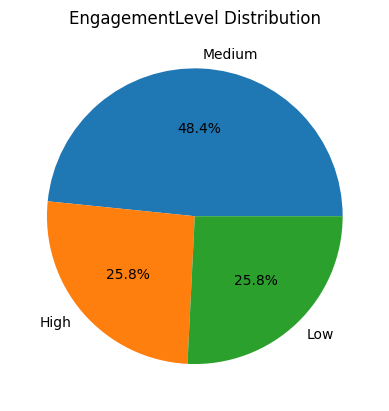

In [12]:
plt.pie(df['EngagementLevel'].value_counts(), labels=df['EngagementLevel'].value_counts().index, autopct='%1.1f%%')
plt.title('EngagementLevel Distribution')
plt.show()

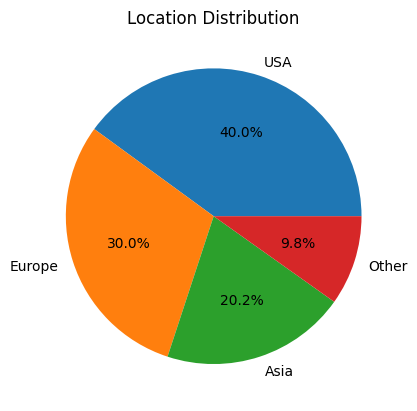

In [13]:
plt.pie(df['Location'].value_counts(), labels=df['Location'].value_counts().index, autopct='%1.1f%%')
plt.title('Location Distribution')
plt.show()

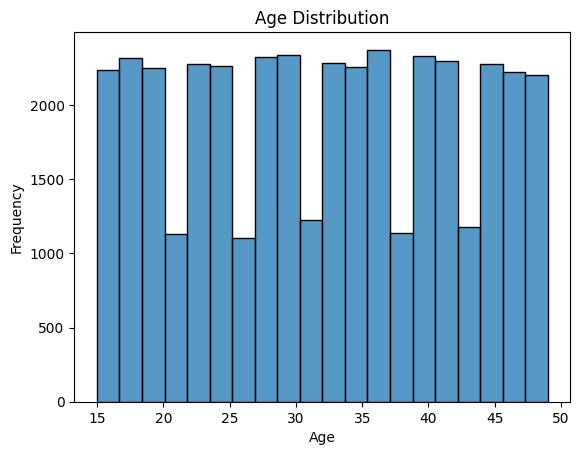

In [14]:
sns.histplot(df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

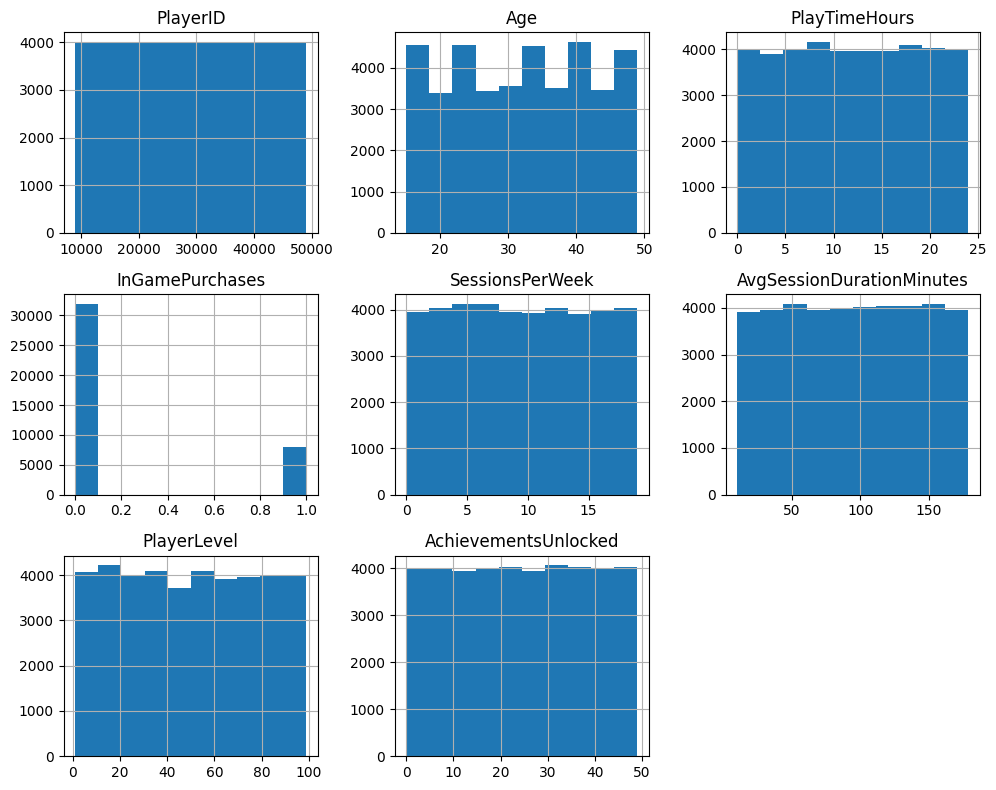

In [15]:
numerical_data = df.select_dtypes(include='number')

numerical_data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

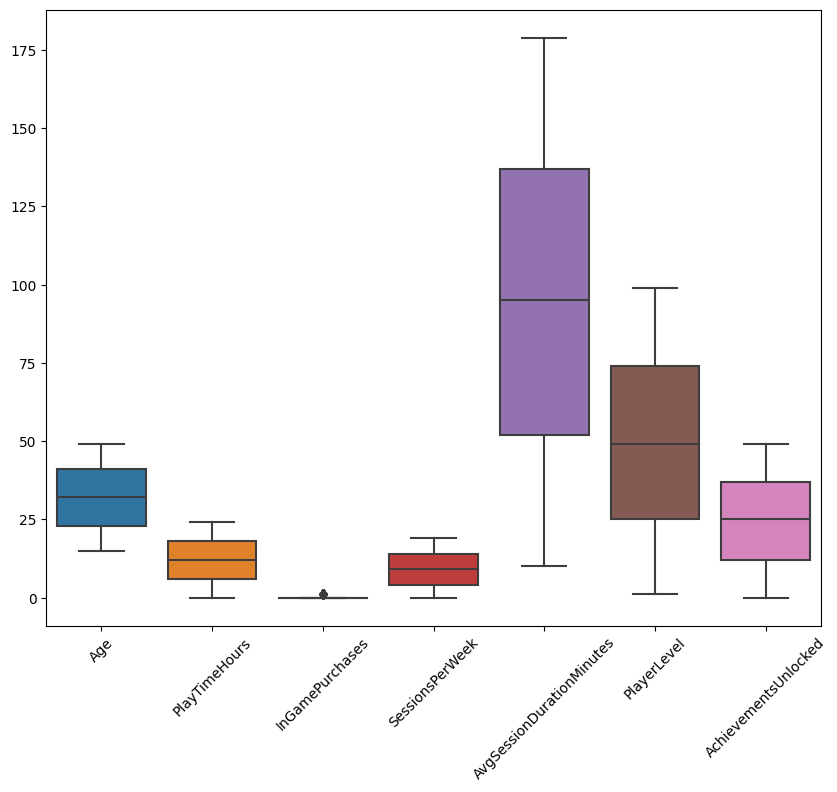

In [16]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.boxplot(numerical_data.drop(columns=['PlayerID']))
plt.xticks(rotation=45)
plt.show()

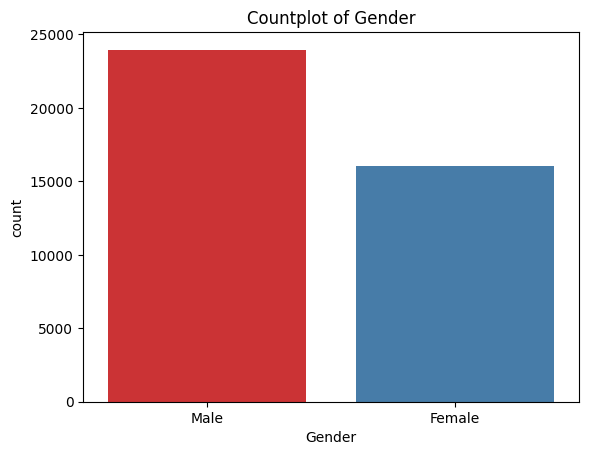

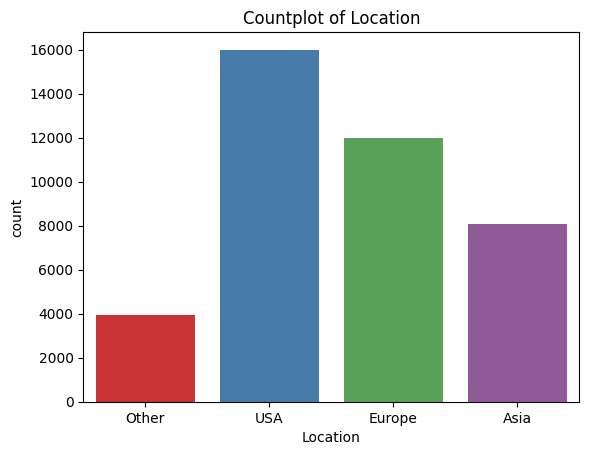

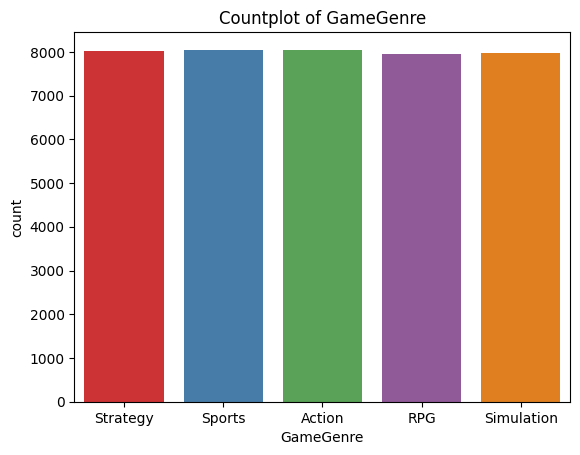

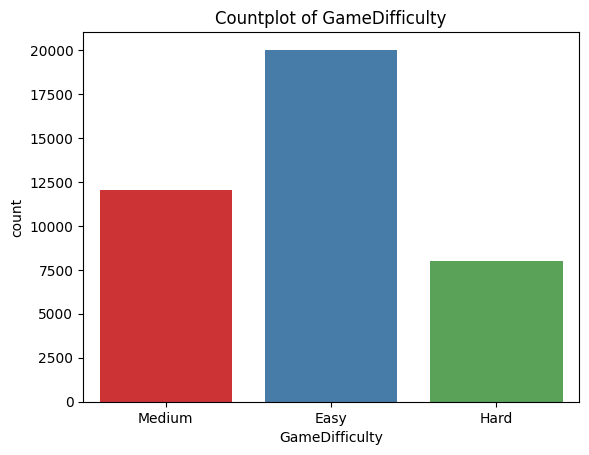

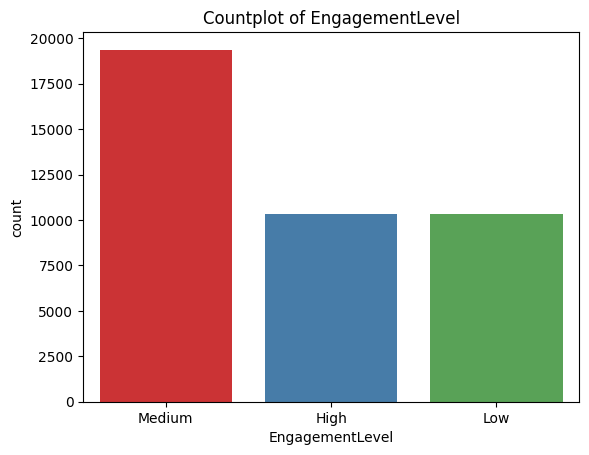

In [17]:
categorical_data = df.select_dtypes(exclude='number')
for column in categorical_data.columns:
    sns.countplot(data=categorical_data, x=column, palette="Set1")
    plt.title(f"Countplot of {column}")
    plt.show()

**Multivariate Analysis**

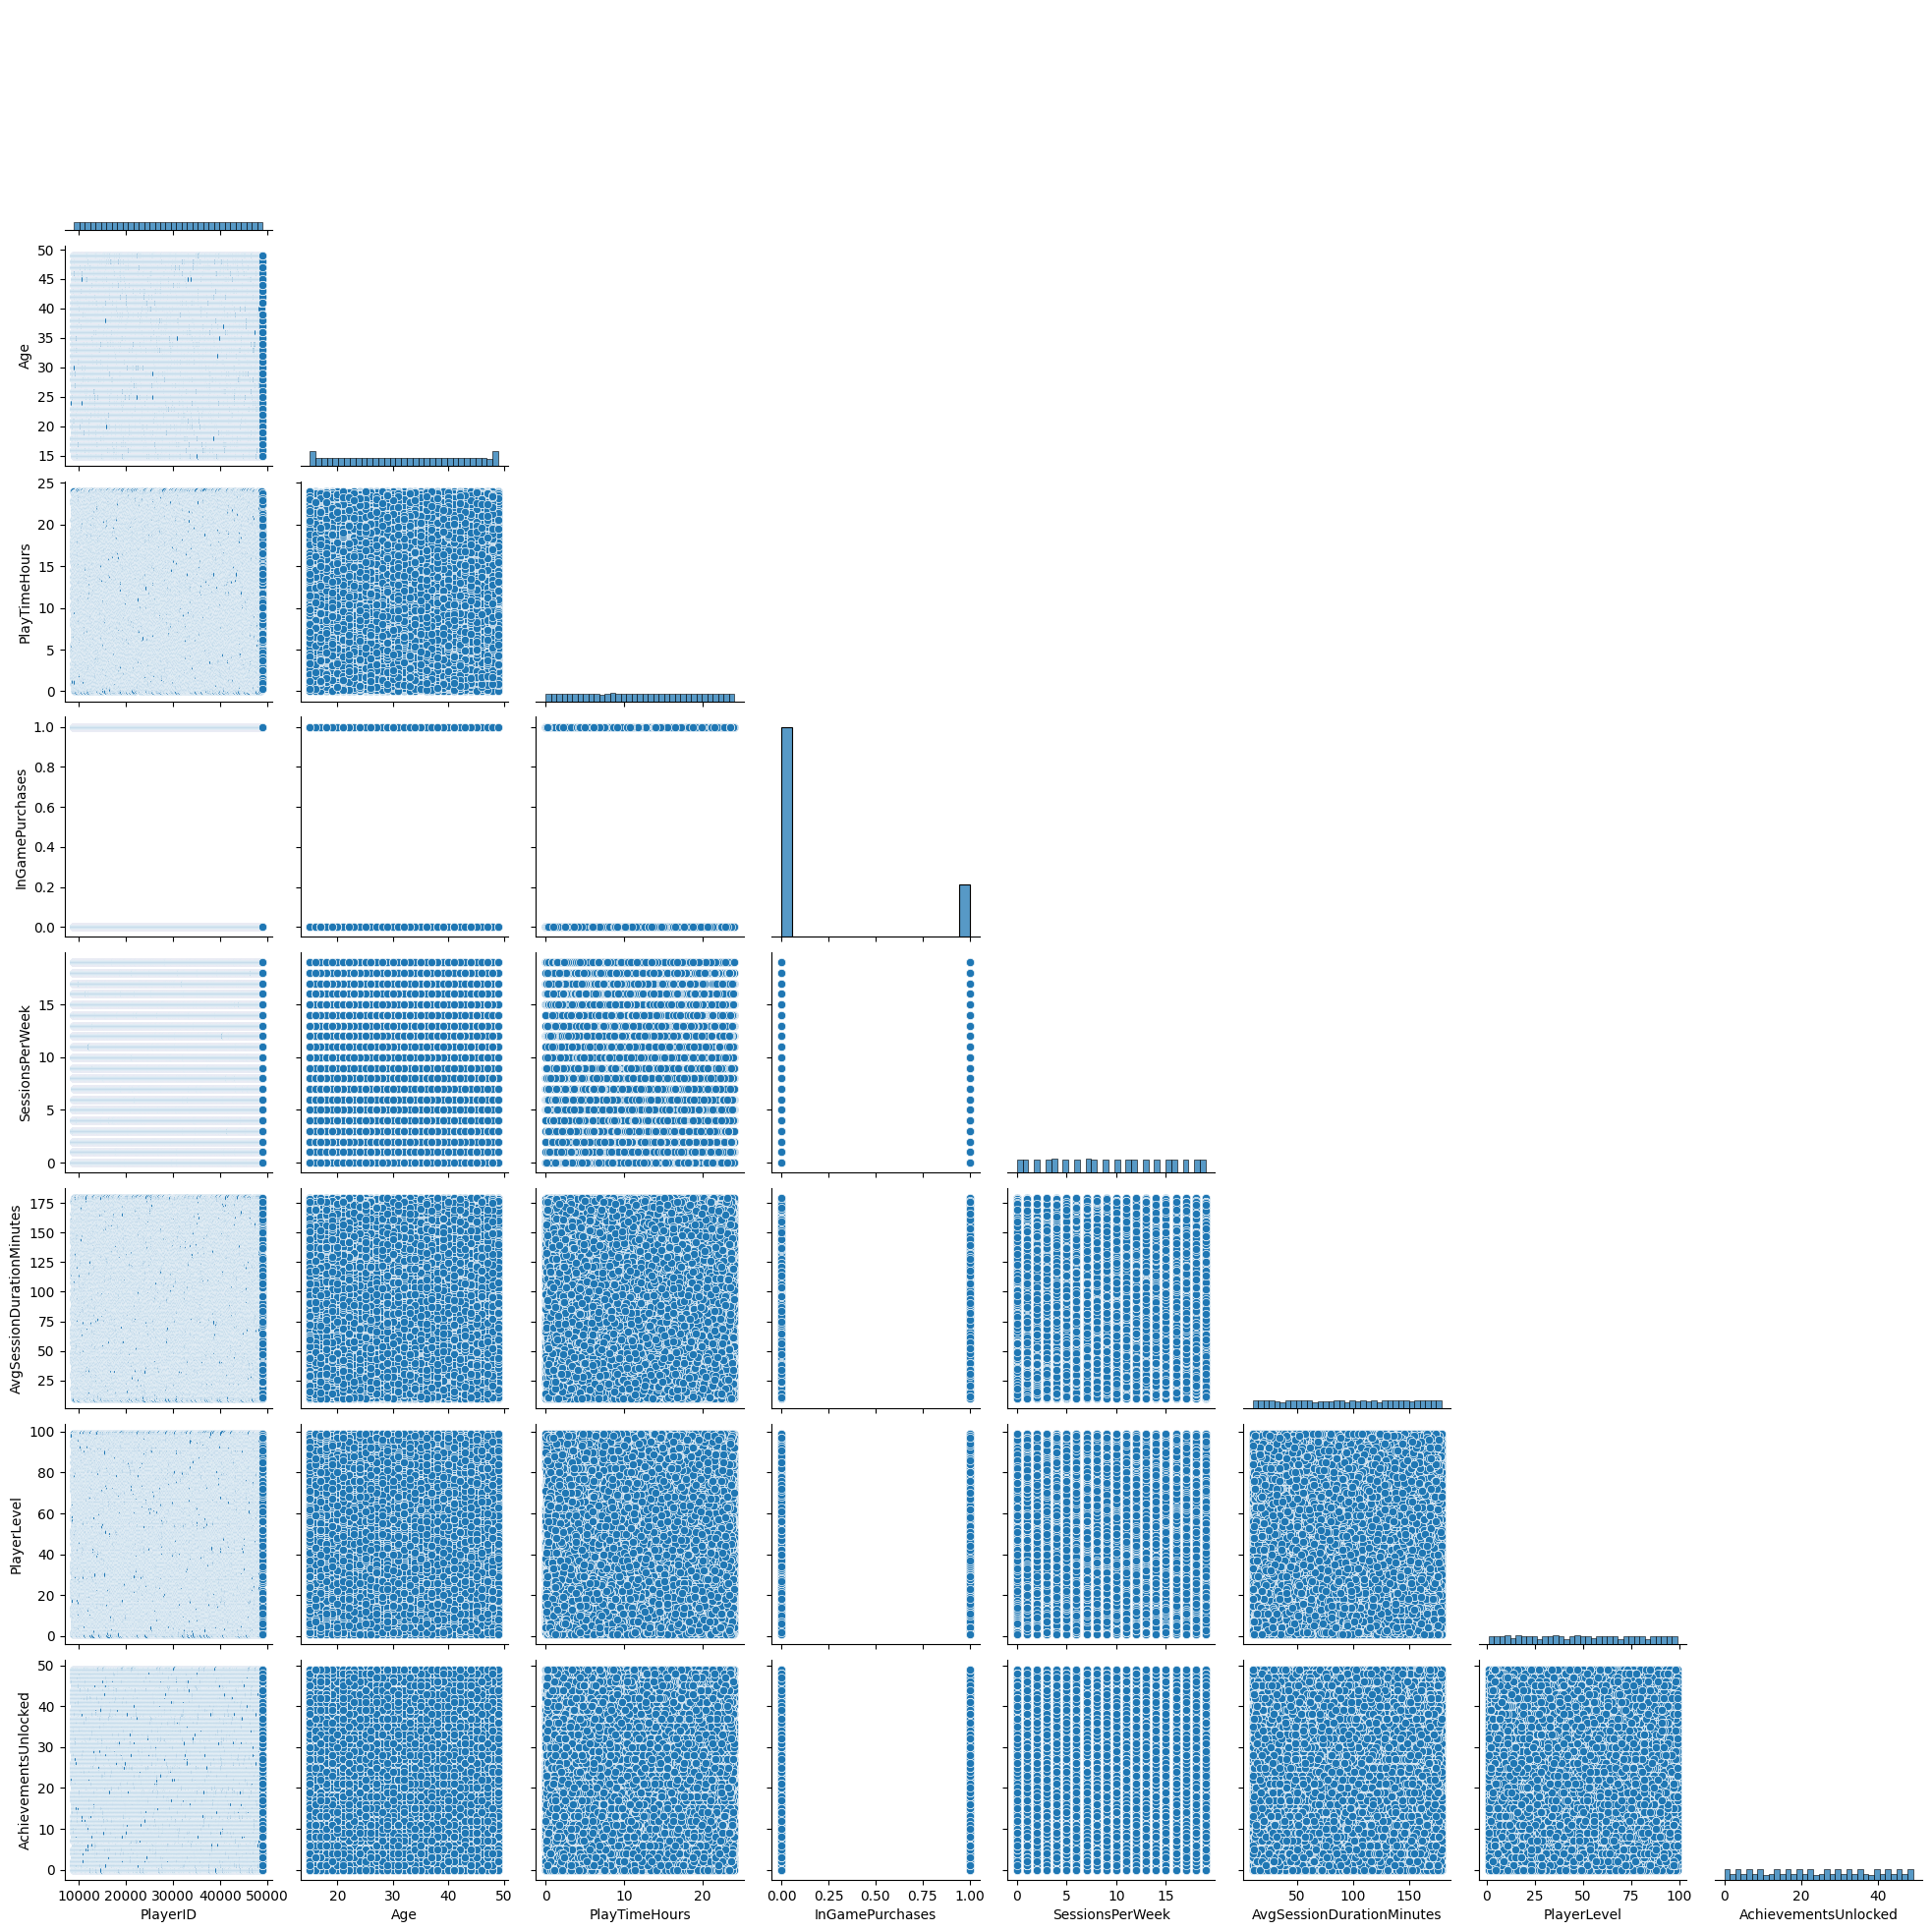

In [18]:
sns.pairplot(df,corner = True)
plt.show()

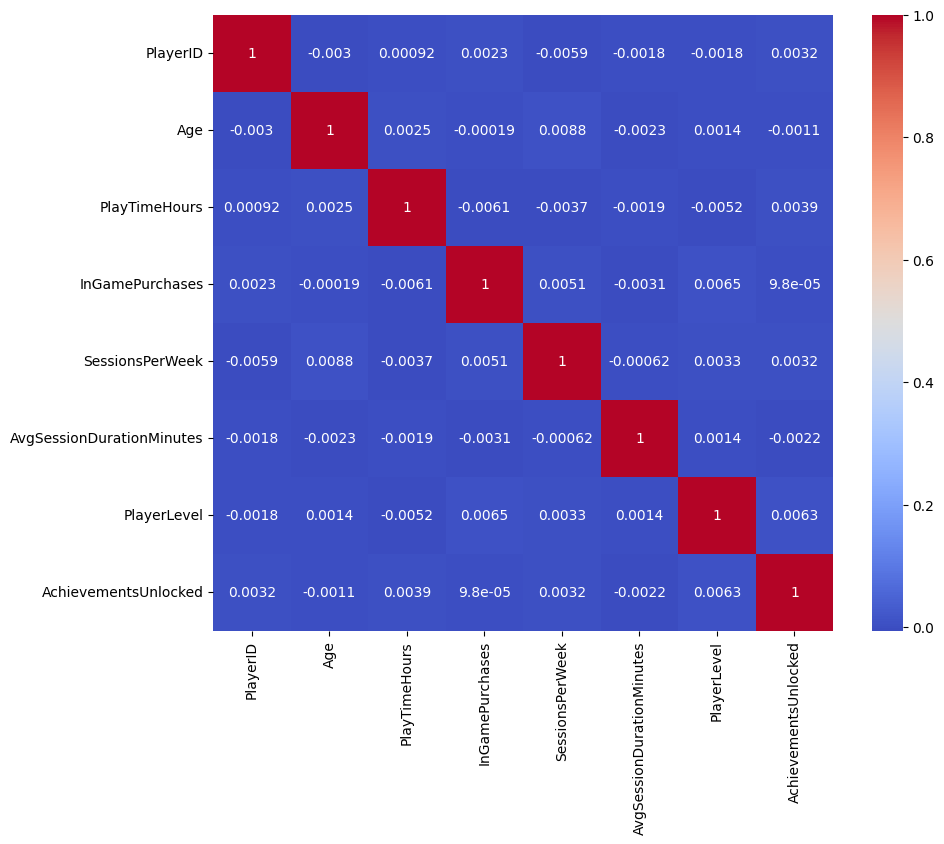

In [19]:
corr = df.select_dtypes(exclude=['object']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,annot=True, cmap='coolwarm')
plt.show()

# **Data Cleaning**
---

**Drop Unnecessary Columns**

In [20]:
df.drop(['PlayerID'], axis=1, inplace=True)

**Handling Duplicate Rows**

In [21]:
duplicate_rows = df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


**Handling Missing Data**

In [22]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Age,0,0.0
Gender,0,0.0
Location,0,0.0
GameGenre,0,0.0
PlayTimeHours,0,0.0
InGamePurchases,0,0.0
GameDifficulty,0,0.0
SessionsPerWeek,0,0.0
AvgSessionDurationMinutes,0,0.0
PlayerLevel,0,0.0


In [23]:
total = df.isnull().sum().sum()
print('Total Null values =' ,total)

Total Null values = 0


# **Data Preprocessing**
---

**Encoding Categorical Variables**

In [24]:
categorical_data.head(10)

,Gender,Location,GameGenre,GameDifficulty,EngagementLevel
0,Male,Other,Strategy,Medium,Medium
1,Female,USA,Strategy,Medium,Medium
2,Female,USA,Sports,Easy,High
3,Male,USA,Action,Easy,Medium
4,Male,Europe,Action,Medium,Medium
5,Male,Europe,RPG,Easy,Low
6,Male,USA,Action,Hard,Low
7,Female,Asia,RPG,Medium,Medium
8,Female,Europe,Simulation,Easy,Medium
9,Female,Other,Sports,Easy,High


In [25]:
df['Gender'] = df['Gender'].apply(lambda x: 0 if x == 'Female' else 1)

In [26]:
ordinal_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['EngagementLevel'] = df['EngagementLevel'].map(ordinal_mapping)

In [27]:
ordinal_mapping = {'Easy': 0, 'Medium': 1, 'Hard': 2}
df['GameDifficulty'] = df['GameDifficulty'].map(ordinal_mapping)

In [28]:
encoder = BinaryEncoder()
df = encoder.fit_transform(df)

In [29]:
df.head(10)

,Age,Gender,Location_0,Location_1,Location_2,GameGenre_0,GameGenre_1,GameGenre_2,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,43,1,0,0,1,0,0,1,16.271119,0,1,6,108,79,25,1
1,29,0,0,1,0,0,0,1,5.525961,0,1,5,144,11,10,1
2,22,0,0,1,0,0,1,0,8.223755,0,0,16,142,35,41,2
3,35,1,0,1,0,0,1,1,5.265351,1,0,9,85,57,47,1
4,33,1,0,1,1,0,1,1,15.531945,0,1,2,131,95,37,1
5,37,1,0,1,1,1,0,0,20.561855,0,0,2,81,74,22,0
6,25,1,0,1,0,0,1,1,9.752716,0,2,1,50,13,2,0
7,25,0,1,0,0,1,0,0,4.401729,0,1,10,48,27,23,1
8,38,0,0,1,1,1,0,1,18.152733,0,0,5,101,23,41,1
9,38,0,0,0,1,0,1,0,23.942772,0,0,13,95,99,36,2


**Data splitting**

In [30]:
X = df.drop(['EngagementLevel'], axis=1)
y = df['EngagementLevel']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.125,random_state=44,stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test,test_size=.5,random_state=44,stratify=y_test)

**Data Normalization**

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# **Modeling**
-----

In [32]:
classifiers = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('xgboost', xgb.XGBClassifier())
]

Logistic Regression:
Cross Val Score: 0.82
F1 Score: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       645
           1       0.80      0.89      0.84      1211
           2       0.91      0.84      0.87       646

    accuracy                           0.83      2502
   macro avg       0.84      0.81      0.82      2502
weighted avg       0.83      0.83      0.83      2502



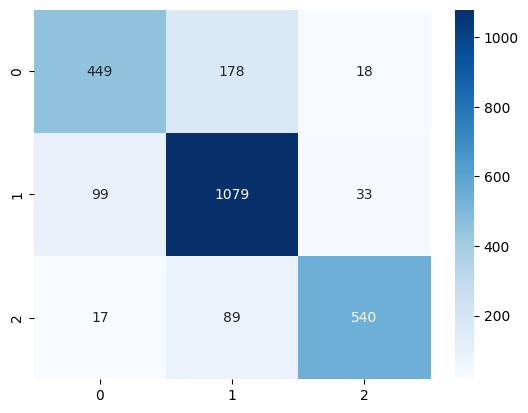

---------------------------------------------------
K-Nearest Neighbors:
Cross Val Score: 0.71
F1 Score: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.60      0.64       645
           1       0.70      0.82      0.75      1211
           2       0.83      0.70      0.76       646

    accuracy                           0.73      2502
   macro avg       0.74      0.70      0.72      2502
weighted avg       0.73      0.73      0.73      2502



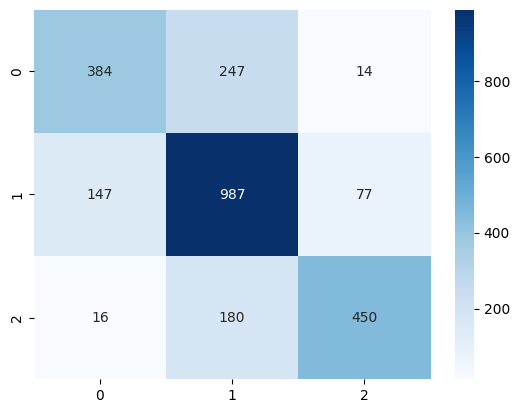

---------------------------------------------------
Support Vector Machine:
Cross Val Score: 0.89
F1 Score: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       645
           1       0.88      0.94      0.91      1211
           2       0.92      0.86      0.89       646

    accuracy                           0.89      2502
   macro avg       0.90      0.88      0.89      2502
weighted avg       0.89      0.89      0.89      2502



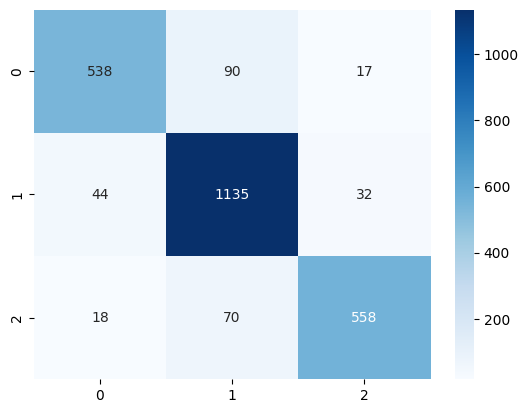

---------------------------------------------------
Decision Tree:
Cross Val Score: 0.83
F1 Score: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       645
           1       0.88      0.85      0.86      1211
           2       0.78      0.80      0.79       646

    accuracy                           0.83      2502
   macro avg       0.81      0.82      0.82      2502
weighted avg       0.83      0.83      0.83      2502



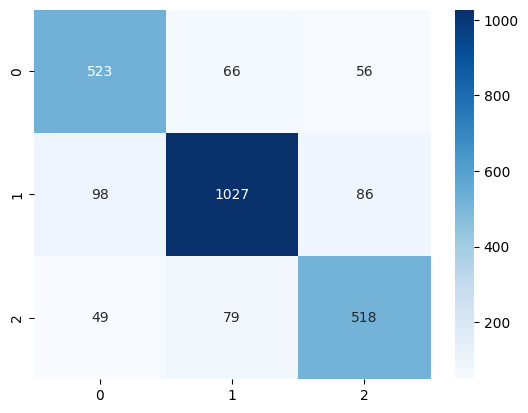

---------------------------------------------------
Random Forest:
Cross Val Score: 0.90
F1 Score: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       645
           1       0.89      0.94      0.92      1211
           2       0.92      0.85      0.89       646

    accuracy                           0.90      2502
   macro avg       0.91      0.89      0.90      2502
weighted avg       0.90      0.90      0.90      2502



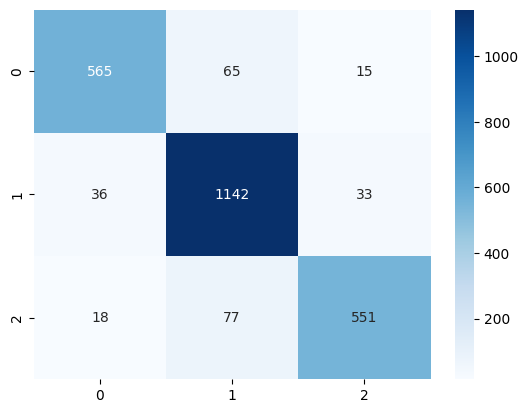

---------------------------------------------------
Gradient Boosting:
Cross Val Score: 0.91
F1 Score: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       645
           1       0.91      0.94      0.93      1211
           2       0.92      0.89      0.90       646

    accuracy                           0.91      2502
   macro avg       0.91      0.90      0.91      2502
weighted avg       0.91      0.91      0.91      2502



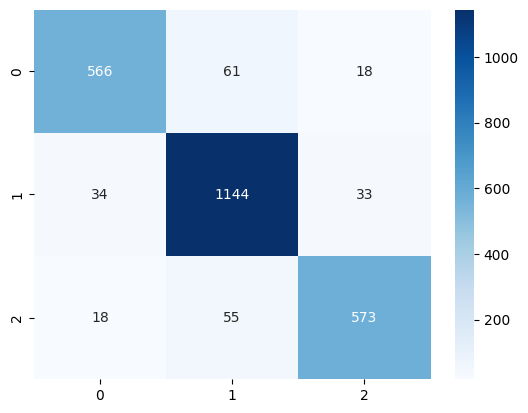

---------------------------------------------------
xgboost:
Cross Val Score: 0.91
F1 Score: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       645
           1       0.92      0.95      0.93      1211
           2       0.92      0.90      0.91       646

    accuracy                           0.92      2502
   macro avg       0.92      0.91      0.91      2502
weighted avg       0.92      0.92      0.92      2502



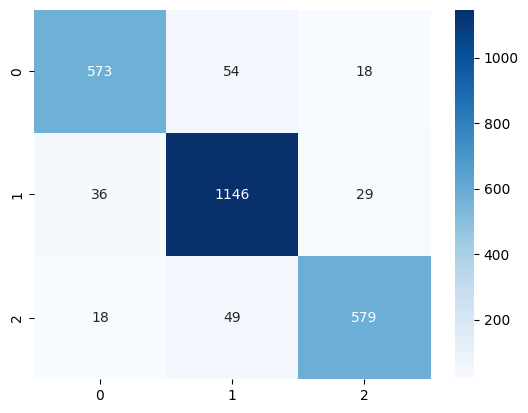

---------------------------------------------------


In [33]:
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    print(f'{clf_name}:')
    print(f"Cross Val Score: {cv_scores.mean():.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
    plt.show()
    print('---------------------------------------------------')

# **DNN**
-----

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping , ReduceLROnPlateau
from tensorflow.keras.metrics import F1Score

2024-08-15 09:12:51.493976: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-15 09:12:51.494106: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-15 09:12:51.776593: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [35]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [36]:
ES = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
RL = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

In [37]:
model.compile(optimizer='Nadam', loss='sparse_categorical_crossentropy', metrics=[F1Score])

In [38]:
history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_data=(X_val, y_val), callbacks=[ES,RL])

Epoch 1/150
 60/548 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.4783 - loss: 1.0200

I0000 00:00:1723713193.551467     103 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


548/548 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - f1_score: 0.4865 - loss: 0.6604 - val_f1_score: 0.4884 - val_loss: 0.3956 - learning_rate: 0.0010
Epoch 2/150
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - f1_score: 0.4896 - loss: 0.3909 - val_f1_score: 0.4886 - val_loss: 0.3791 - learning_rate: 0.0010
Epoch 3/150
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - f1_score: 0.4905 - loss: 0.3589 - val_f1_score: 0.4915 - val_loss: 0.3863 - learning_rate: 0.0010
Epoch 4/150
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - f1_score: 0.4891 - loss: 0.3546 - val_f1_score: 0.4908 - val_loss: 0.3671 - learning_rate: 0.0010
Epoch 5/150
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - f1_score: 0.4889 - loss: 0.3424 - val_f1_score: 0.4894 - val_loss: 0.3577 - learning_rate: 0.0010
Epoch 6/150
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - f1_score: 0.4891 - loss: 0.3452 - val_f1_score: 0.4888 - val_loss: 0.3567 - learning_rate: 0.0010
Epoch 7/150
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - f1_score: 0.4882 - loss: 0.3298 - val_f

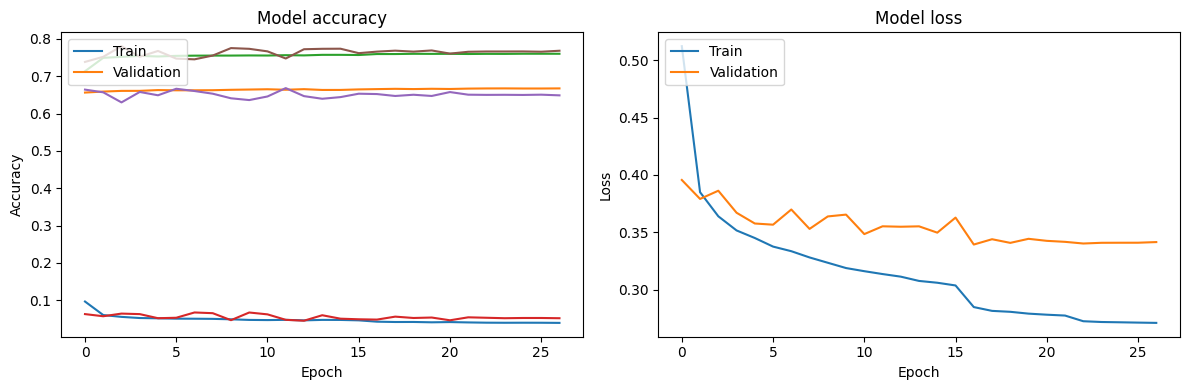

In [39]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [40]:
model.evaluate(X_test, y_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - f1_score: 0.4846 - loss: 0.3160


[0.3293071389198303,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.04172012, 0.6652508 , 0.7576726 ], dtype=float32)>]